In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

%matplotlib inline

from kagg.distance import PowerDistance
from kagg.gfunc import GFuncExp, GFuncPow
from kagg.kagg import KAgg

In [2]:
iris = pd.read_csv("data/iris.data")

In [3]:
cls_seq = iris["cls"]
cls_names = list(cls_seq.unique())
cls_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [4]:
Y = np.array([cls_names.index(name) for name in cls_seq])
X = np.c_[iris["sl"],iris["sw"],iris["pl"],iris["pw"]]

pca = PCA(2)
pca.fit(X)
U = pca.transform(X)

In [5]:
dist_func = PowerDistance(2.0)
gfunc = GFuncExp(2.0, 0.5)
kagg = KAgg(dist_func, gfunc, eps=1.0e-5, t0=0.01, max_epoch=1000)
kagg.fit(U, n_centers=2)
print('K=', kagg.state['K'])
centers = kagg.state['centers']
print(centers)

K= 24
[[-2.47202937 -0.11803932]
 [ 1.39268076  0.06646555]]


In [6]:
vals = kagg.predict(U)
colors = []
for val in vals:
    colors.append([val[0],val[1],0])

In [7]:
x1min, x1max = min(U[:,0]), max(U[:,0])
x2min, x2max = min(U[:,1]), max(U[:,1])
x1 = np.linspace(x1min, x1max, 100)
x2 = np.linspace(x2min, x2max, 100)
xx, yy = np.meshgrid(x1, x2)
XX = np.c_[xx.ravel(), yy.ravel()]
vals2 = kagg.predict(XX)
YY = vals2[:,0]
YY = YY.reshape(xx.shape)
colors2 = []
for val in vals2:
    colors2.append([val[0],val[1],0])

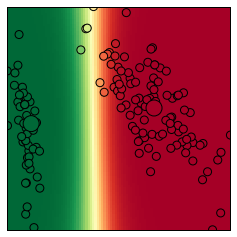

In [8]:
plt.figure(figsize=(4,4))
plt.imshow(YY, extent=(x1min, x1max, x2min, x2max), origin="lower", aspect="auto", interpolation="nearest", cmap=plt.cm.RdYlGn)
#plt.scatter(xx.ravel(), yy.ravel(), c=colors2, s=9, edgecolors=colors2)
sc = plt.scatter(U[:,0], U[:,1], c=vals[:,0], s=64, cmap=plt.cm.RdYlGn)
plt.scatter(centers[:,0], centers[:,1], c=[1,0], s=256, cmap=plt.cm.RdYlGn)
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
# for p in [1.0, 1.5, 2.0]:
#     for s in [0.2, 1.0, 5.0]:
#         dist_func = PowerDistance(p)
#         gfunc = GFuncExp(s, 1./p)
#         kagg = KAgg(dist_func, gfunc, eps=1.0e-4, t0=0.01, max_epoch=1000)
#         kagg.fit(U, n_centers=3)
#         print('K=', kagg.state['K'])
#         centers = kagg.state['centers']
#         print(centers)       
        
#         vals = kagg.predict(U)
#         colors = []
#         for val in vals:
#             colors.append([val[0],val[1],0])   
            
#         x1 = np.linspace(4,8.5,100)
#         x2 = np.linspace(1.0,5.0,100)
#         xx, yy = np.meshgrid(x1, x2)
#         XX = np.c_[xx.ravel(), yy.ravel()]
#         vals2 = kagg.predict(XX)
#         YY = vals2.reshape(xx.shape)
#         colors2 = []
#         for val in vals2:
#             colors2.append([val[0],val[1],0])            

K= 1001
[[ 0.58769354  0.03257719]
 [ 0.52049169  0.03928341]
 [ 0.52221233  0.03418335]]


ValueError: total size of new array must be unchanged